In [149]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

#### Combine All Sales Data

In [150]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

year_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    year_data = pd.concat([year_data,df])

year_data.to_csv("./Sales_Data/2019_Year_Sales.csv", index = False)

#### Read Combined Data File

In [151]:
year_data = pd.read_csv("./Sales_Data/2019_Year_Sales.csv")
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data

#### Remove Empty Rows

In [152]:
year_data = year_data.dropna(how='all')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean Non-Date Data From Order Date Column

In [153]:
year_data = year_data[year_data['Order Date'].str[0:2]!='Or']

In [154]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])

#### Create a Month Column

In [155]:
year_data['Month']= pd.to_numeric(year_data['Order Date'].str[0:2])
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales Column

In [156]:
year_data['Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']

#### Add a City Column

In [157]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

## Month With Best Sales

#### Monthly Sales Sorted By Most Sales to Least

In [158]:
results = year_data.groupby('Month').sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,196798,32118907.87,32294103.38
10,158921,26008883.81,26157088.16
4,143906,23573697.14,23734691.68
11,138586,22264204.76,22397222.40
5,130669,21945875.91,22068247.25
3,119035,19538454.81,19649702.66
7,112504,18427776.92,18534430.32
6,106771,17934179.27,18044615.82
8,94136,15612417.94,15711275.16


##### We see that December has the most sales and January has the least sales

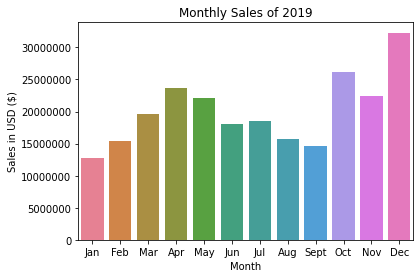

In [159]:
month_label = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ax = sns.barplot(x=month_label, y=results['Sales'], hue = month_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.xticks(month_label)
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales of 2019')
plt.show()

## City With Most Sales

#### Sales For Each City Sorted By Most Sales to Least

In [160]:
results = year_data.groupby(['City']).sum()
results.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,351673,57480232.18,2208640,57835427.37
Los Angeles CA,233023,37950046.61,1458275,38167995.60
New York City NY,195524,32447595.81,1230187,32650222.01
Boston MA,157696,25461868.39,987784,25631494.07
Atlanta GA,116214,19459357.40,733558,19568490.06
Dallas TX,117110,19268394.74,732340,19375827.80
Seattle WA,115871,19133072.07,734587,19234288.36
Portland OR,79121,13023907.54,494347,13095126.38
Austin TX,78071,12669115.27,488803,12737072.25


##### We see that San Francisco CA has the most sales and Portland ME has the least sales

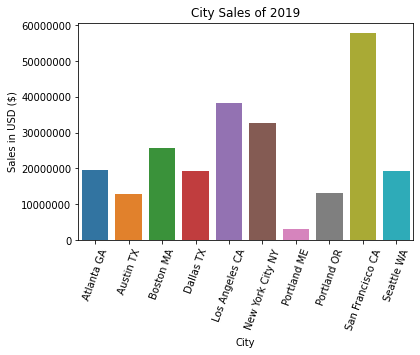

In [161]:
city_label = [city for city, df in year_data.groupby('City')]
ax = sns.barplot(x=city_label, y=results['Sales'], hue = city_label)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False)) #We want the full value of sales to be shown
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=70)
plt.xlabel('City')
plt.xticks(city_label)
plt.ylabel('Sales in USD ($)')
plt.title('City Sales of 2019')
plt.show()